<h2> 1. Libraries </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

<h2> 2.Data Wrangling </h2>

In [2]:
path= "C:\\Users\\alexander.leite\\Desktop\Machine Learning\\datasets\iris.csv"

In [3]:
Df_Iris = pd.read_csv(path, sep=",", header=None)
Df_Iris.columns = ['sepal length','sepal width','petal length','petal width','class']

In [4]:
Df_Iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Df_Iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
setosa = Df_Iris[Df_Iris['class']=='Iris-setosa']
versicolor = Df_Iris[Df_Iris['class']=='Iris-versicolor']
virginica = Df_Iris[Df_Iris['class']=='Iris-virginica']

Text(0,0.5,'petal lenght')

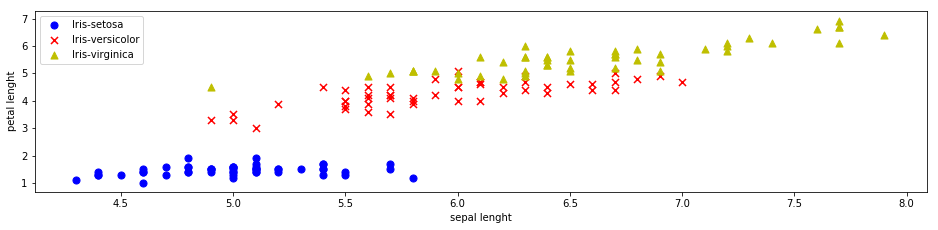

In [7]:
fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 1, 1)
ax.scatter(setosa['sepal length'], setosa['petal length'], s=50, c='b', marker='o', label='Iris-setosa')
ax.scatter(versicolor['sepal length'], versicolor['petal length'], s=50, c='r', marker='x', label='Iris-versicolor')
ax.scatter(virginica['sepal length'], virginica['petal length'], s=50, c='y', marker='^', label='Iris-virginica')
ax.legend()
ax.set_xlabel('sepal lenght')
ax.set_ylabel('petal lenght')

Text(0,0.5,'petal width')

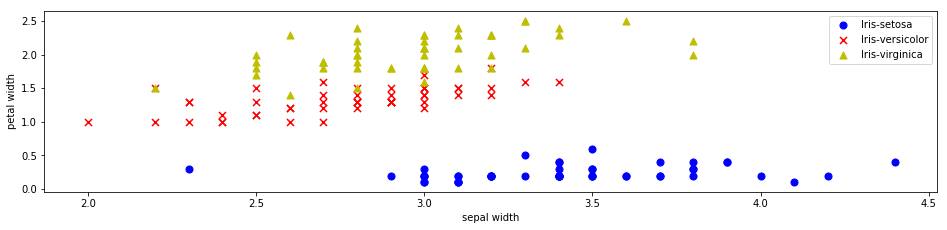

In [8]:
fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 1, 1)
ax.scatter(setosa['sepal width'], setosa['petal width'], s=50, c='b', marker='o', label='Iris-setosa')
ax.scatter(versicolor['sepal width'], versicolor['petal width'], s=50, c='r', marker='x', label='Iris-versicolor')
ax.scatter(virginica['sepal width'], virginica['petal width'], s=50, c='y', marker='^', label='Iris-virginica')
ax.legend()
ax.set_xlabel('sepal width')
ax.set_ylabel('petal width')

<h2> 3.Train and test the model </h2>

In [9]:
X = Df_Iris.iloc[:,:-1]
y = Df_Iris['class']

In [10]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(100, 4)
(50, 4)
(100,)
(100,)


In [49]:
## Creating a range list so "K" can loop to look for the best "K" parameter
k_range = range(1,50)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0,0.5,'Testing Accuracy')

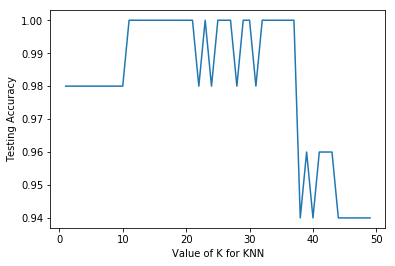

In [50]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [54]:
## After analyzing the plot, we can define that "K=5" would be a nice parameter to the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')